##### Заголовки HTTP — это строки в HTTP-сообщении, содержащие разделённую двоеточием пару имя-значение. Заголовки должны отделяться от тела сообщения хотя бы одной пустой строкой.

##### заголовки авторизации:

https://developer.mozilla.org/ru/docs/Web/HTTP/%D0%90%D0%B2%D1%82%D0%BE%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F#Authentication_schemes

Нам нужен тип авторизации Bearer

##### content-type header

http://www.iana.org/assignments/media-types/media-types.xhtml#multipart

##### отправить html

In [ ]:
s = open('1.html', 'r').read().encode('utf-8')
r = requests.post("https://httpbin.org/post", headers={'Content-Type': 'text/html; charset=utf-8'}, data=s ) 

In [ ]:
print(r.content.decode('utf-8'))

In [ ]:
!curl -v -d "@1.html" -X POST -H "Content-Type: text/html; charset=utf-8"  http://httpbin.org/post

##### отправить multipart

In [ ]:
!pip install requests_toolbelt

In [ ]:
import json
import requests
from io import BytesIO
from PIL import Image
from requests_toolbelt.multipart.encoder import MultipartEncoder

multipart_data = MultipartEncoder(
    fields={
            'key':b'ZaeC8aidairahqu2Eeb1quee9einaeFieboocohX', 
            'checksum':b'8b35228856009749645fb076cf6d2522',  
            'image' : ('image', open('0.jpeg', 'rb'), 'text/plain')
    }
)

response = requests.post(
    'http://httpbin.org/post', 
     data=multipart_data,
    
     headers={
    'X-Date':'1512560854',
    'Accept':'*/*',
    'Accept-Language':'en-KZ;q=1.0, ru-KZ;q=0.9',
    'Accept-Encoding':'gzip;q=1.0, compress;q=0.5',
    'Connection':'keep-alive',
    'X-Supported-Features':'post-action-33569;publish-proactive-moderation-40003;warning-on-flow-finish-500;helpcenter-form-46049',
    'Cookie':'v=1512560568; dfp_group=9; nps_sleep=1; sessid=b2db33b2031651d263e86064df33352a.1512560620; u=26nfpud4.1fc6o2p.fm7aacmojj',
    'user-agent': 'AVITO 21.0 (iPhone7,2; 11.0.1; en_KZ)',
    'Content-Type': multipart_data.content_type,
    'Content-Length': str(multipart_data.len),
})

print( json.loads(response.content) )

In [ ]:
print(response.content.decode('utf-8'))

##### То же самое курлом.

https://ec.haxx.se/http-multipart.html

In [ ]:
!curl -v -X POST -F "image=@./0.jpeg" \
-F "key=ZaeC8aidairahqu2Eeb1quee9einaeFieboocohX" \
-F "checksum=8b35228856009749645fb076cf6d2522" \
http://httpbin.org/post

##### WSGI

```python

def simple_app(environ, start_response):
    """
    (dict, callable( status: str,
                     headers: list[(header_name: str, header_value: str)]))
                  -> body: iterable of strings
    """
    status = '200 OK'
    response_headers = [('Content-type', 'text/plain')]
    start_response(status, response_headers)
    return 'Hello world!\n'

```

https://ruhighload.com/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F+%D0%BA%D0%BE%D0%BD%D1%84%D0%B8%D0%B3%D1%83%D1%80%D0%B0%D1%86%D0%B8%D1%8F+nginx

https://ruhighload.com/scaling+%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F+%D0%BD%D0%B0+python%2fdjango

# Parsing

In [ ]:
!pip install requests bs4 user_agent

In [113]:
import requests
from bs4 import BeautifulSoup
import json
import re

In [114]:
#Сделаем простой запрос, получим страничку с ленты
r = requests.get("https://lenta.ru/2018/06/16/")
print(r.ok)
print(r.status_code)
print(r.cookies)

True
200
<RequestsCookieJar[<Cookie lid=vAsAAK3DnFwjJLpbAUhBAQB= for .lenta.ru/>, <Cookie lids=4839242330EB5A96 for .lenta.ru/>]>


In [ ]:
print(r.text)

In [ ]:
#Попробуем запросить несуществующую страницу
r = requests.get("https://lenta.ru/2018/10/32/")
print(r.ok)
print(r.status_code)
print(r.cookies)

In [ ]:
#TODO загрузите основную страницу техноатома

In [ ]:
#Создаем элемент типа soup
r = requests.get("https://lenta.ru/2019/03/27")
soup = BeautifulSoup(r.text, "html.parser")

In [ ]:
#Найдем элементы в теге div. При этом будут найдены все теги, любой вложенности
print(soup.find_all('div')[0])

In [ ]:
print(soup.find_all('div')[0].attrs)

In [ ]:
#Найдем все элементы под тегом div, у которых атрибут класс:titles
soup.findAll("div", attrs={"class": ["titles"]})

In [ ]:
print(soup.findAll("div", attrs={"class": ["titles"]})[2])
print()
print(soup.findAll("div", attrs={"class": ["titles"]})[2].find('a'))
print()
print(soup.findAll("div", attrs={"class": ["titles"]})[2].find('a').attrs)
print()
print(soup.findAll("div", attrs={"class": ["titles"]})[2].find('a')['href'])
print()
print(soup.findAll("div", attrs={"class": ["titles"]})[2].find('a').text)

In [ ]:
#TODO сохранить все ссылки в словарь вида: {href: title}

### Сложнее - AVITO

In [ ]:
def get_product_info_avito(url):
    product_page = requests.get(url)
    soup = BeautifulSoup(product_page.text, "html.parser")
    
    title = re.findall(r"(?=content=\"([^\"]*)\")",
                       str(soup.find("meta", attrs={"name":"mrc__share_title"})), re.UNICODE)[0]
    
    if title.startswith(u"Объявление на Avito -"):
        title = title[21:]
        
    descr = re.findall(r"(?=content=\"([^\"]*)\")",
                       str(soup.find("meta", attrs={"name":"mrc__share_description"})), re.UNICODE)[0]
    return url, title, descr


def get_smilar_avito(url):
    headers = {u"accept": u"*/*", u"accept-encoding": u"gzip, deflate, br",
           u"accept-language": u"ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
           u"cookie": u"u=26m3i302.1fc6nq6.flumvzf17n; buyer_location_id=637640; abp=1; _ga=GA1.2.1386374517.1519811174; _vwo_uuid_v2=D5AF40B1213C5F49AEE8A45D8584418ED|06e85eceee6cdc4810096a7268f54acb; cto_lwid=85c9fbb1-8918-4cc4-a91d-2a757134e844; _vis_opt_s=1%7C; _vis_opt_test_cookie=1; _ym_uid=1519811174428571120; _vwo_uuid=D5AF40B1213C5F49AEE8A45D8584418ED; __gads=ID=c16722fa56933ba1:T=1519811174:S=ALNI_MYLAba7KfXbX-Amt7ypPSVfyyTdzA; _vis_opt_exp_46_exclude=1; __utma=99926606.1386374517.1519811174.1521126280.1521126280.1; __utmc=99926606; __utmz=99926606.1521126280.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); dfp_group=52; _vwo_ds=3%3Aa_0%2Ct_0%3A0%241526386623%3A47.11855471%3A%3A%3A18_0%2C12_0; sessid=bbc4979ea3347bd02e9b3ed7349589c7.1527492578; _gid=GA1.2.91958680.1527492579; _ym_isad=1; f=5.673c10cb09ba31f34b5abdd419952845a68643d4d8df96e9a68643d4d8df96e9a68643d4d8df96e9ba029cd346349f36c1e8912fd5a48d02c1e8912fd5a48d02c1e8912fd5a48d02c1e8912fd5a48d02c1e8912fd5a48d02c1e8912fd5a48d0246b8ae4e81acb9fa143114829cf33ca746b8ae4e81acb9fa46b8ae4e81acb9fae992ad2cc54b8aa82351fe598a5894ec615ab5228c34303140e3fb81381f3591fed88e598638463b2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eab2da10fb74cac1eabc6c679871524fbf7ddc1bb7967f85dcbbd0ca7a45a8813cec5b922a937441bee49f5ff0743e01b943fdc85926d4eb0def5a18441d6f5f811652c8d9bab9891ff60768b50dd5e12c36a95541ff881623729cd2db18e763082465d5650ed2fd5c1685428d00dc691fa9e82118971f2ed6494d66450ac1e729244734ef48a8669163de19da9ed218fe23de19da9ed218fe2da5ad592e16af4d7e45e6a89df371af55cc35db011f710a1998c47e34a42c61a; _vis_opt_exp_74_exclude=1; _vis_opt_exp_71_exclude=1; _vis_opt_exp_69_exclude=1; v=1527504434; nps_sleep=1; sx=H4sIAAAAAAACA53PUW7CMAyA4bv4mQcndcHtbTYnBMkBb%2FXaVKDenTJp0p65wPfrf8BAOFzmPNVZBBs5o6ApFYPxAQuM0E3f%2BJPz2iVUNhZWdSVmc1FuBQ6QYQx9PPUc%2Bxi2A8T1g76W83W9XZ0EtTibtqL6HkkvcpbAHd5iUkLWgu5SmjX%2FI2v4rCWJ1DvRPqFY0Hy39jY2b%2F%2FIAbn7JZeUZUp1rkcjdTHCpk5vkTEMtG1PS1Phf00BAAA%3D; isHeartsEnabled=0; _nfh=3cef57cbf431e38a89658bc44a326af9; _gat_UA-2546784-1=1",
           u"referer": url,
           u"user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36",
           u"x-requested-with": "XMLHttpRequest"}
    
    pr_id = url.split("_")[-1]
    
    similars = requests.get("https://www.avito.ru/js/similar/" + pr_id + "?offset=0", headers=headers)
    
    sim_urls = []
    for i, json_part in enumerate(similars.json()['similarsJson']):
        sim_urls.append([url, i, "https://www.avito.ru" + json_part['url']])
        
    return sim_urls

In [ ]:
#TODO Попробовать загрузить похожие и информацию об 1 продукте с авито

In [ ]:
#Создадим список проксей и проверим их доступность

from time import sleep
from user_agent import generate_user_agent
import random
import requests

proxies_list = [{'http':'http://'+i} for i in ['67.149.217.254:10200',
                '64.20.74.24:45554','62.37.237.101:8080', '180.234.206.77:8080',
                '78.11.85.13:8080', '109.188.81.101:8080', '97.77.49.151:45554',
                '139.59.17.113:8080', '191.179.147.46:11421', '111.76.129.223:808',
                '111.68.99.42:8080', '80.241.219.66:3128', '189.16.249.114:8080',
                '201.20.94.106:8080', '216.229.120.173:45554',
                '116.58.247.31:3128', '103.9.115.142:3128',
                '82.164.99.193:10200', '80.188.79.138:8080',
                '36.75.113.224:8080', '1.20.204.163:8080',
                '178.54.44.24:8080', '65.182.136.153:45554',
                '203.142.81.205:8080', '42.202.35.185:8118', '66.162.122.24:8080']]

for i in range(len(proxies_list)):
    sleep(random.random())
    assert 200 == requests.get('https://yandex.ru', 
                               headers={'User-Agent': generate_user_agent()},
                               proxies=proxies_list[i]).status_code
    
print ('all_proxies_are_worked!\n\n')

In [ ]:
def get_proxy():
    return proxies_list[random.randint(0, len(proxies_list) - 1)]

#TODO сделаем декоратор, который будет генерировать случайную задержку на исполнение функции
def delay_decorator(func):
    return

# TODO Модернизируем функцию, которая парсит похожие. 
# Будем генерировать user-agent, не будем передавать cookies
# используем случайный прокси сервер. Обернем в декоратор задержки
def get_smilar_avito(url):
    return


##### Серп яндекса

In [ ]:
url = 'https://yandex.ru/images/search?source=collections&cbir_id=1602346%2FIPpry_K2zb_n8FdLoUg7PQ&rpt=imageview'

In [ ]:
url = 'https://yandex.ru/images/search?cbir_id=1771173%2FsmYeeP3vhTQK2Qg_XaoULQ&rpt=imageview&from='

In [ ]:
import requests
import os
import glob
from collections import defaultdict

import tqdm
import pickle
from bs4 import BeautifulSoup
from user_agent import generate_user_agent

In [ ]:
resp = requests.get(url)

serp = resp.content

with open('1.html', 'wb') as fout:
    fout.write(serp)
    

In [ ]:
from user_agent import generate_user_agent
from time import sleep
import numpy as np
import requests

proxies_list = [{'http':'http://'+i} for i in ['67.149.217.254:10200',
                '64.20.74.24:45554','62.37.237.101:8080', '180.234.206.77:8080',
                '78.11.85.13:8080', '109.188.81.101:8080', '97.77.49.151:45554',
                '139.59.17.113:8080', '191.179.147.46:11421', '111.76.129.223:808',
                '111.68.99.42:8080', '80.241.219.66:3128', '189.16.249.114:8080',
                '201.20.94.106:8080', '216.229.120.173:45554',
                '116.58.247.31:3128', '103.9.115.142:3128',
                '82.164.99.193:10200', '80.188.79.138:8080',
                '36.75.113.224:8080', '1.20.204.163:8080',
                '178.54.44.24:8080', '65.182.136.153:45554',
                '203.142.81.205:8080', '42.202.35.185:8118', '66.162.122.24:8080']]


In [ ]:
cc = 'csw=0; cpr=1; cpw=1366; cph=688; cptrid=747x1553716876295; yandexuid=7600989531484848194; _ym_uid=1484859034846044357; L=Al59BElRfwdgQWJPWVMBTH9ASGNHTFMFEh9ZOFB+aH9Q.1487070769.12953.311166.b80a45c254aed32011bcb0d57bcf1261; mda=0; yandex_login=Amir14111; my=YwA=; addruid=P15M2T8JO0t57Iz2n64g4o6Wi2; fuid01=5bf70c0a4ba842c2.GX-ztfkeGAtTU1YFd8sNGtvPibXNDIU2Hdtj3SGu1ZV5FjaTmcpxtSqGaASUgcM_sb_0K3um7pIaIgXx3bt77r33ANWNAUYJVufgXR8ZdL7HFnDgzS9zVO0dQT4BCkoM; ys_fp=form-requestid%3D1542548125959990-991489254761084160054682-sas1-9038; yabs-frequency=/4/0W0009oQMre00000/9nuuRN0pWG00/; yandex_gid=213; Session_id=3:1553504260.5.0.1487070769301:VWhdvA:7a.1|332246457.0.2|196774.749273.BBpF75UnD2U9udXEGkzVP3Iwy6I; sessionid2=3:1553504260.5.0.1487070769301:VWhdvA:7a.1|332246457.0.2|196774.842650.6nOeVzK3DFBONExXamBAapQ48uQ; zm=m-white_bender.webp.css-https%3Awww_AxpbqXI0IL4a75SCEBM9uOLHT1A%3Al; _ym_d=1553716863; _ym_isad=2; yc=1553976065.zen.cach%3A1553720461; _ym_visorc_50377519=b; ys=ymrefl.AF6E0037A509EFC4#wprid.1553716871311772-12267104160178925400313-vla1-0600; i=k9M5XVogCDiCvMM5fS0Pv4rkLV+ivsi15hhk64AHzv4oFWtILnij9wxWYUrA6VWF396zuRyseiwkCe1FEYY3H6NKuGg=; yp=1800208194.yrts.1484848194#1558906057.szm.1%3A1366x768%3A1366x688#1802430769.udn.cDpBbWlyMTQxMTE%3D#1556305902.csc.1#1565206957.yw_spc.1#1569870027.nt.sport#1554324210.ysl.1#1554815026.ygu.1#1556308872.shlos.1#1555355337.los.1#1556308872.losc.1#1553803286.nps.6857101995%3Aclose; cycada=lqiqnY1UiesQDDaRQh1y9QpQBpytms//GO5bDudjJb0='

In [ ]:
cc = 'sw=10; cpr=1; cpw=1855; cph=980; cptrid=180x1548445872999; i=no7IAtw93EsVXtWWDM8GimkuMUFgVO5BQlWHZKGSO1T1ZfX2iiBZBXnKOKF7bV4G8HGZ5NxfK0TCoISKLKqJFtqYzno=; yandexuid=888373981505396485; yp=1820756485.yrts.1505396485#1820828736.udn.cDpBbWlyMTQxMTE%3D#1569435131.szm.1%3A1920x1080%3A1855x982#1556345537.csc.1#1565852999.yw_spc.1#1569048313.nt.sport#1554472123.ysl.1#1555854586.shlos.1#1555854518.ygu.1#1553864771.nps.2773385350%3Aclose; _ym_uid=1505405436637390813; mda=0; fuid01=59baa9fd080a79b1.MqkKregPmAxKc3ufouqonILu1EhEx_lP3u33nRhHBsSQJkUfVYxhhrSgrud0OiNlHr2CBCeTMV2T0kkamTR2R6CMEZJjolz6dB6hcTJY3Yewbows6pZ4AceGAXeIkrcb; Session_id=3:1553600387.5.0.1505468736700:lCKIAO0KFFkXALqwSBEAKg:83.1|332246457.0.2|196828.387813.Vrsb95x59MxF_EOD9NPWtPwYeOA; sessionid2=3:1553600387.5.0.1505468736700:lCKIAO0KFFkXALqwSBEAKg:83.1|332246457.0.2|196828.315802.8YzVKb_hBm1TSXaVODcXUUH-AT4; L=am1RanxxYEBBZlZCRV1HVX9JRmNrBApsIgkTRFBad3d4.1505468736.13255.333766.b0e979c7d1d1142c97575fdc191f72b8; yandex_login=Amir14111; yabs-frequency=/4/10000Aaapri00000/otGzRNGq8G00/; my=YwA=; zm=m-white_bender.css-https%3Awww__Dg4jDJI5YRZ3EhG_wtSWSlZIPI%3Al; yc=1554018506.zen.cach%3A1553762903; cycada=3pRya5/Put7hOKdcxel6pov+QCzFFmwwOIIV90qH3es=; yandex_gid=213; ys=ymrefl.23F758052660D53F#wprid.1553262609235186-1262148945590474448800038-man2-6558; ys_fp=form-requestid%3D1547988880604851-452917857767138350752895-vla1-1646; _ym_d=1553759304; _ym_isad=2; device_id="a5fa84ae5a6987aadefb91a855ab8323b078ee5c4"'

In [ ]:
resp = requests.get(url, headers={'User-Agent': generate_user_agent(),
                                 'Cookie':cc}, 
                    proxies=proxies_list[3])

In [ ]:
resp.ok

In [ ]:
serp = resp.content

In [ ]:
with open('2.html', 'wb') as fout:
    fout.write(serp)

In [ ]:
serp

In [ ]:
images = defaultdict(lambda: {'sim_img': [], 'tags':[]})

soup = BeautifulSoup(serp, 'html.parser')
key = None
if (u'Похожие картинки' in soup.text) and (u'Кажется, на картинке' in soup.text):
    for li in soup.findAll("li", class_="similar__thumb island"):
        try:
            if key is None:
                key = li.a['href'].split('img_url=')[0].replace('/images/search?&url=http%3A//', '')
            url = li.a['href'].split('img_url=')[1].replace('&rpt=imagelike', '').replace('https%3A//', '')
            images[key]['sim_img'].append(url)
        except:
            pass

    for a in soup.findAll("a", class_="link link_theme_normal link_ajax_yes tags__tag i-bem"):
        images[key]['tags'].append(a.text)

In [ ]:
images

In [ ]:
from io import BytesIO
from PIL import Image

In [ ]:
url = 'https://' + images['/images/search?from=&']['sim_img'][0].split('&')[0]

print(url)

response = requests.get(url)

# save img
with open('1.png', 'wb') as fout:
    fout.write(response.content)

# or use it
img = Image.open(BytesIO(response.content))

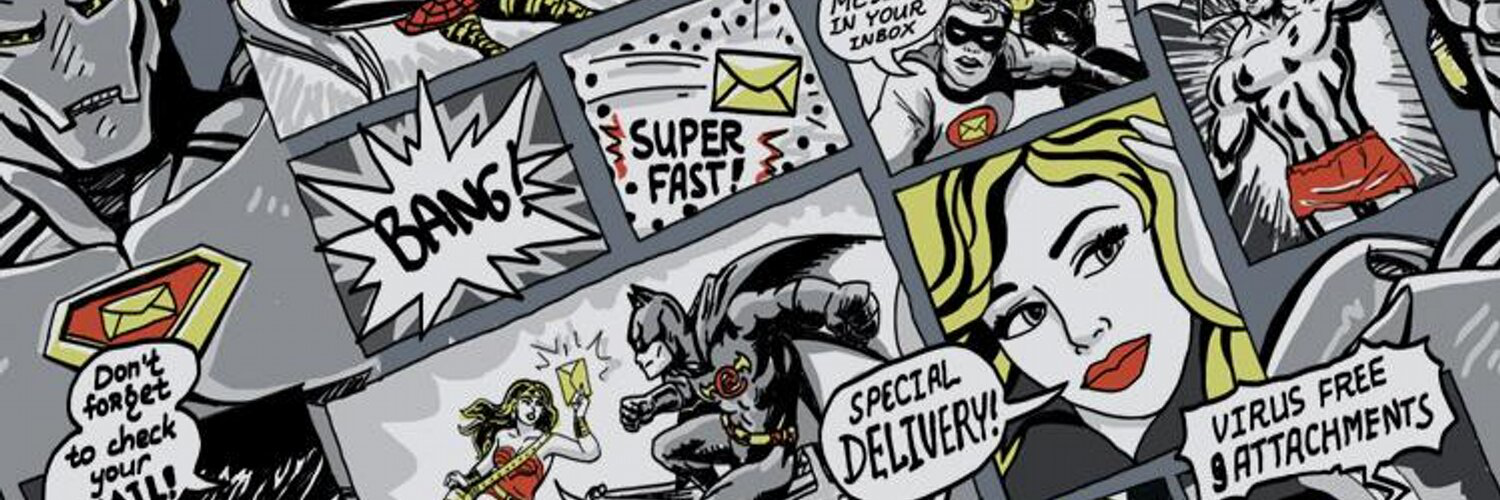

In [229]:
img

## Пойдем посмотрим на панду?

https://pandao.ru

In [ ]:
from functools import lru_cache
import datetime

In [ ]:
headers = {
    'User-Agent': 'Mozila 5/0',
}

@lru_cache(maxsize=100000)
def get_product_info(idx):
    response = requests.get('https://pandao.ru/product/'+idx, 
                            headers=headers, 
                            proxies=proxies_list[random.randint(0, len(proxies_list) - 1 )])
    #time.sleep(0.2)
    if not response.ok:
        return {'idx':idx, 'title':0, 'price':0, 'old_price':0, 
            'rating':0, 'orders':0}
    
    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find('div', {'class':"product-title"})
    if title:
        title = ' '.join(title.text.split())
    else:
        title = 'None'

    price = soup.find('p', {'class':"current-price"})
    if price:
        price = float(price.attrs['content'])
    else:
        price = 0

    rating = soup.find('span', {'class':"sale-rating"})
    if rating:
        rating = float(rating.text.split(' ')[0])
    else:
        rating = 0
        
    return {'idx':idx, 'title':title, 'price':price, 
            'rating':rating }

In [ ]:
prd_ids = ['0ddd2f40-39cf-4288-9c4d-1b32f2ddd142', 
'97154181-8921-48be-9397-35c2ff5f5111',
'5a0a0808-c432-406b-ba36-382a797ae74a', '2f21e653-0fe4-4b35-867b-29eefe9a1b39',
'0dcad2bc-226d-4e37-b602-754ac564ea50', '017a2150-d5a0-413b-9be3-0d59bdddc895',
'464a9254-e7f4-4bde-8f09-c356e59228be', 'dd507101-c239-46ef-86c0-7d8cdb598374',
'41ccd8d7-1514-4534-9958-beb7a1ee9797', '41ccd8d7-1514-4534-9958-beb7a1ee9797',
'8a3ec31f-8b80-45a1-aab0-51b6425005f7', 'b80043b6-67f5-448c-8565-1a0d6c8b3449',
'b902f630-68c0-4be5-93ec-d7d1d322c97e', '5f98612e-d999-426c-a74d-d3a2439e5ded',
'2ea3a39f-7f96-4e45-b04a-7f7349100f6b', '65058295-d8ca-4d36-871b-e1a50247656e',
'95414baf-0203-4c6a-9b90-f3bb9e0c3bae',
'94bf017f-3a3c-48f2-95cf-972ab92b5c0f', 'c094fe15-b54e-445d-ba1b-a2897e9710d4',
'126d746f-0458-4874-85e3-47d72e9bd261',
'592d4b46-e7b5-4a06-86f8-0fda04047918', '3e5348a1-add0-410e-9ef6-5f919ca65a3f',
'5600652c-ce34-41c1-9f57-1066eb8a0e6c', 'e4d0ea4f-fc51-4af4-b996-4479d4b06cdd',
'2b3c649b-b7dc-462f-9b23-cf92d7d373ba',
'cd5b75ff-010f-416f-846a-9886d935a2fc', '88c7d55b-6dff-4878-8f7b-c82a9302ea17',
'65e2be8a-bd34-4e8b-9cf0-774d7e0e99a0',
'bde6300a-b268-4724-ac2d-88e439acabf0', '9566efbd-b94f-42a6-b13f-eecb51a54a51',
'e16c4a79-79e2-46ea-a0d0-9cfb863d110a',
'43c43bb6-d9fd-4e8b-ac6c-f572cbc944d4', 'eabd6d3a-0e12-4c01-862d-8eb1e0ee67c5',
'94c58080-3fcd-408a-8a2e-10297f61060e', 'a9fb97f1-8534-410d-bd1a-0f8341311c48',
'e8437e9b-96b5-45fc-b2d7-27d54abfbd4e', '9af479fa-9904-419d-9289-a9f7a254b5f6',
'3568d795-e02d-42fb-a85b-a488e01445cc',
'43b92387-d118-4fc5-871e-6615417b1d79', 'fc2a66f4-550a-4944-b796-cc4c15ac7201',
'96b701c9-a14f-4fa0-8a46-99ac62418598',
'b158cc8b-279e-45c9-9b06-20ec25e1cf42', '7687608c-c3d0-48a5-893e-7a2f5a277578',
'906c782b-119f-4398-bac6-9969b4c117ab',
'8a708ccd-6a51-4712-bec6-912fcc2bc2d3', 'b4851d65-1e38-473c-a190-2e862f4cb8cd',
'd456cfb8-c2da-4f89-abcc-16df65bcfb18', '51455200-78a7-4353-8f08-c90b4f149165',
'c0e41577-42c4-4402-a89c-5418da501b8c', '90516e9b-ace8-43bf-8eca-f8df95b1f03a',
'027f8d2f-dc8f-4dff-a5e8-87a5d3cfeb69', '14bc4955-48b1-43d3-9dc7-b18332367254',
'17a22405-34ec-45dc-b7a5-35034b8f9346',
'3d954a88-1534-499e-9b01-d82cca8afda3', '3eacaa93-ab98-4165-bec8-5ae96adb4df8',
'952570e0-19c1-44af-bd6d-aa7d546986c8',
'a27f0148-d5e6-4457-ad21-1d257f270967' , 'b82844af-d28d-4f33-9038-c9fd27bc5c24',
'0e873862-8750-4604-9dd8-b718b1391532',
'cc362ad5-e232-4727-87d0-1c571f1eefe1', '9c237e0b-10ac-48c1-a7fe-7bb6f72ce927',
'e87632c9-6764-4ee5-862f-0b84b7ce2914', '14e38f1a-1d95-4238-8381-ad3c3fc2d31e',
'4c6bc3d5-a389-4f57-9d89-f61d4eacc77b',
'7933813d-f6a0-4352-ba4f-824bc98680a8', '32781d36-806b-45eb-bb2d-4bca80d8b6f2',
'72cd2efc-51d9-4a45-a710-7fc62359a4d9', '4c8ac5d2-0307-462a-aaac-ba6ffe562a55',
'81ef7c5e-d936-4f44-96d8-3a6cb87be0c4', '8f92e4b3-4d09-46f3-a24b-3da800c64c77',
'380d96de-e974-4141-af46-2f765e5fc984', '6fd9abec-7ef8-4842-b24d-c06b4e60bc59', 
'45253494-0c26-4a21-ae11-569343c55ade',
'fb524119-dd0c-4575-ad67-31f116c0ad5c', '0f32e154-9063-4e31-a6e6-2a5f41a8d16c',
'06839e0e-80d7-490a-a1d1-706cb0f65837', '4fd83c9f-cd16-477c-8054-ff17b5c225c3',
'c14c3277-f011-4da1-9d64-56ce89d6e23c',
'9534385e-2373-48f4-9c6a-9ef1c3b02e09', '488d58b0-faa4-483a-ae4d-d541dc436483', 
'740b5673-11b1-43a8-b2cc-558e5bb9705d', '94c58080-3fcd-408a-8a2e-10297f61060e',
'36da7efb-4f78-4325-9f4b-fc9ea2f76e3e',
'f38acc05-d3d9-43a6-a310-e37e35a06258', '5f98612e-d999-426c-a74d-d3a2439e5ded',
'63baf2b4-89ac-4667-ba39-e45596bdc7fc',
'95414baf-0203-4c6a-9b90-f3bb9e0c3bae', '340c64be-c30b-4be3-83dd-e675c7ed533b',
'39cca812-e5e7-4c76-a521-def0292fb184', '6fd9abec-7ef8-4842-b24d-c06b4e60bc59',
'7bbe3f2c-d5ef-4f23-878c-4c9abec6c75e', '1c39cf24-1ae1-445f-b9e7-233cb102e9ce',
'786860b0-dfb6-4a20-b2b0-f40f69088508', '9af479fa-9904-419d-9289-a9f7a254b5f6', 
'22fba623-c746-45af-9d94-7d78f73ef031', 'a08a7522-3dfb-49cd-a682-b3c32d5538d5',
'73b8ff53-288b-46f8-85a8-593e198ba491', '85a89ff0-a438-40fe-aa59-d47ac5353b5d',
'955eedc1-4211-4d42-976c-0f5149a29d2a',
'349982e9-ad32-4e27-8c68-c4e8e4e4491b', '9798f731-b4af-45f4-88aa-5798d1e84c27',
'19b9e842-7756-4a71-a01e-081c3819aa17',
'756ac7ba-88ce-476e-a4ba-24a175273aeb', '49b4589d-6421-4852-8d88-4eb6cb317064',
'455f22e7-732b-478b-a412-822436c790a9'
]

In [ ]:
len(prd_ids)

In [ ]:
# do not forget for tests !
get_product_info.cache_clear()

In [ ]:
result = {}
time_begin = datetime.datetime.now()

for i, idx in enumerate(prd_ids):
    data = get_product_info(idx)
    result[data['idx']] = data
    if i % 10 == 0:
        print ('computed %d lines in %s' % (i, str(datetime.datetime.now() - time_begin)[:11]))
        
time_end = datetime.datetime.now()
print('whole time = ', time_end-time_begin)

In [ ]:
result

# Джонни, давай сделаем быстрее?

![](https://johnny-service.ru/assets/templates/img/rd.jpg)

> Капитан, у меня есть решение - асинхрощина, о которой нам говорили на прошлом занятии

>> и новая стандартная либа о которой мы еще не говорили

![](https://cdn.fishki.net/upload/post/2018/08/15/2677535/tn/d2.png)

##### Очистить кэши!

In [ ]:
# do not forget for tests !

get_product_info.cache_clear()

In [ ]:
import datetime
import concurrent.futures

CONNECTIONS = 4
time_begin = datetime.datetime.now()
result = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=CONNECTIONS) as executor:
    
    dicts_with_result = {
        executor.submit(get_product_info, idx): idx for idx in prd_ids}
    
    for i, future in enumerate(concurrent.futures.as_completed(dicts_with_result)):
        if i % 10 == 0:
            print ('computed %d lines in %s' % (i, str(datetime.datetime.now() - time_begin)[:11]))
        try:
            data = future.result()
            result[data['idx']] = data
        except Exception as exc:
            print (exc, i, future)
        finally:
            pass
        
time_end = datetime.datetime.now()

print('whole time = ', time_end-time_begin)

In [ ]:
result

In [ ]:
# do not forget for tests !
get_product_info.cache_clear()

In [ ]:
CONNECTIONS = 4
time_begin = datetime.datetime.now()
result = {}

with concurrent.futures.ProcessPoolExecutor(max_workers=CONNECTIONS) as executor:
    
    dicts_with_result = {executor.submit(get_product_info, idx): idx 
                   for idx in prd_ids}
    
    for i, future in enumerate(concurrent.futures.as_completed(dicts_with_result)):
        if i % 10 == 0:
            print ('computed %d lines in %s' % (i, str(datetime.datetime.now() - time_begin)[:11]))
        try:
            data = future.result()
            result[data['idx']] = data
        except Exception as exc:
            print (exc, i, future)
        finally:
            pass
        
time_end = datetime.datetime.now()

print('whole time = ', time_end-time_begin)

##### Сравним потоки и процессы

In [ ]:
### TODO

In [ ]:
dicts_with_result[future]

In [ ]:
!curl https://www.yandex.ru

In [ ]:
!curl https://www.yandex.ru

In [ ]:
!curl -o 1.json -X GET \
-H "user-agent: Mozila" \
-H "Cookie:v=1512560568; dfp_group=9; nps_sleep=1;" \
-H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8" \
'https://www.avito.ru/js/similar/1290458439?offset=0' 

In [ ]:
!curl -v -X POST -F "image=@./0.jpeg" \
-F "key=ZaeC8aidairahqu2Eeb1quee9einaeFieboocohX" \
-F "checksum=8b35228856009749645fb076cf6d2522" \
http://httpbin.org/post

In [ ]:
curl -X GET

curl -X POST

In [ ]:
curl -F - эмулирует форму отправки через кнопку

curl -d 

вроде как одинаковые, позволяют загружать данные через POST запрос, вместе не сочетаются

-d @file
-d "string"
--data "string"

-F name=@file
-F name=content
--form name=content

In [ ]:
curl -v       - трассировка-дебаг

In [ ]:
curl -H       - хедеры

https://www.tutorialspoint.com/unix_commands/curl.htm